### Mod 4 Code Review Discussion Multiple Linear Regression 


The data set that is being used has the following variables:
    
|  Variable |  Representation |
| --- | -- | 
| <div style="text-align: left"> date </div> | <div style="text-align: center"> date measurements were taken </div> |
| <div style="text-align: left"> age </div> | <div style="text-align: center"> age in years </div> |
| <div style="text-align: left"> body_wt </div> | <div style="text-align: center"> body weight in kg </div> |
| <div style="text-align: left"> chest_girth </div> | <div style="text-align: center"> chest girth in cm </div> |
| <div style="text-align: left"> body_len </div> | <div style="text-align: center"> length of body in cm </div> |



## Import the bear_statistics.csv file into a pandas dataframe

In [52]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import IPython.display as ipd
from statsmodels.formula.api import ols

# Import Data by reading the csv file
bears_df = pd.read_csv('bear_statistics_cleaned.csv')
print('Head of full data set')
print(bears_df.head())

Head of full data set
   order       date     sex   age  body_wt  chest_girth  body_len
0      9  8/11/2005  FEMALE  1.67    26.31         54.2     113.3
1      6  5/11/2004  FEMALE  1.42    27.22         59.0     127.0
2     11  8/31/2007  FEMALE  1.67    22.68         60.0     109.0
3    129  6/20/2007    MALE  1.50    32.21         62.0     131.0
4    151  9/28/2010    MALE  1.75    36.29         63.0     121.0


In [53]:
# create a new datafrom with only the columns we need
bears_df = bears_df[['sex','age','body_wt', 'chest_girth', 'body_len']]

### Create a new dataframe for only female bears

In [54]:
# Create a new dataframe with only female bears 
female_bears_df = bears_df[bears_df['sex']=='FEMALE']
print(female_bears_df.head())

      sex   age  body_wt  chest_girth  body_len
0  FEMALE  1.67    26.31         54.2     113.3
1  FEMALE  1.42    27.22         59.0     127.0
2  FEMALE  1.67    22.68         60.0     109.0
5  FEMALE  2.67    44.45         63.0     123.0
8  FEMALE  1.92    40.82         66.0     136.0


In [55]:
# Filter the male_bears_df for the specified age range
age_range_df = female_bears_df[(female_bears_df['age'] >= 7) & (female_bears_df['age'] <= 8.5)]

# Calculate the mean weight for the filtered records
mean_weight = age_range_df['body_wt'].mean()

print(f"The mean weight of female bears between the age of 7 and 8.5 is: {mean_weight:.2f} units")

The mean weight of female bears between the age of 7 and 8.5 is: 97.52 units


In [56]:
age_range_df.describe()

,age,body_wt,chest_girth,body_len
count,5.000000,5.00000,5.000000,5.000000
mean,7.650000,97.52400,101.240000,162.200000
std,0.374366,22.84902,13.638292,12.075802
min,7.000000,79.38000,89.000000,150.000000
25%,7.670000,81.65000,90.900000,155.500000
50%,7.830000,92.99000,101.000000,156.000000
75%,7.830000,97.52000,102.000000,170.500000
max,7.920000,136.08000,123.300000,179.000000


In [57]:
# Filter the male_bears_df for the specified chest girth range
chest_girth_range_df = female_bears_df[(female_bears_df['chest_girth'] >= 60) & (female_bears_df['chest_girth'] <= 70)]

# Calculate the mean weight for the filtered records
mean_weight = chest_girth_range_df['body_wt'].mean()

print(f"The mean weight of male bears with a chest girth between 60 and 70 is: {mean_weight:.2f} units")

The mean weight of male bears with a chest girth between 60 and 70 is: 40.69 units


In [58]:
# Filter the male_bears_df for the specified body length range
body_len_range_df = female_bears_df[(female_bears_df['body_len'] >= 130) & (female_bears_df['body_len'] <= 150)]

# Calculate the mean weight for the filtered records
mean_weight = body_len_range_df['body_wt'].mean()

print(f"The mean weight of female bears with a body length between 130 and 150 is: {mean_weight:.2f} units")

The mean weight of female bears with a body length between 130 and 150 is: 59.75 units


In [59]:
# Collect a random sample of 100 Female Bears
female_bears_df = female_bears_df.sample(n=100, random_state=1)

### Extract bears in the age range of 3 to 4 years old

## Create scatter plots of chest girth vs body weight, age vs body weight, and body length vs body weight.   
### Create correlation coefficients and p-values for each of the three scatter plots.

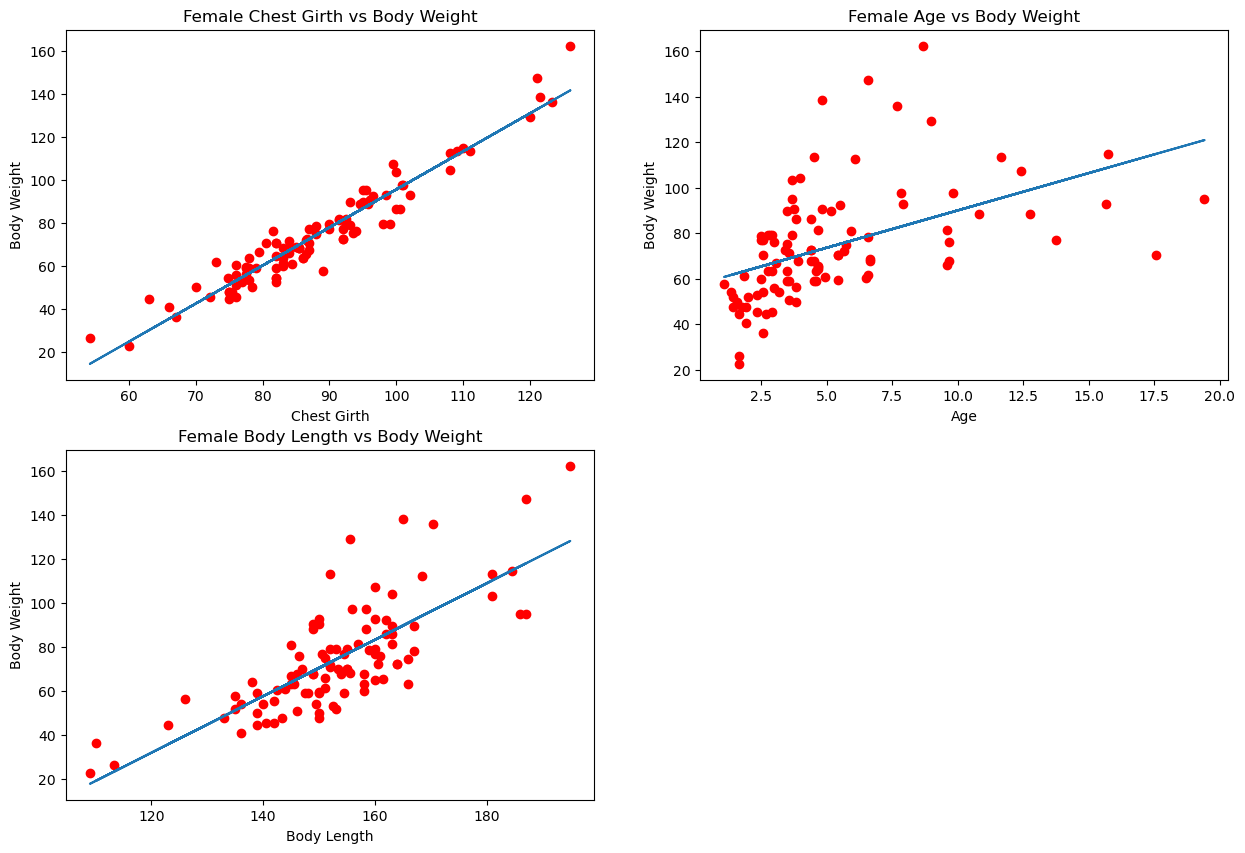

Correlation coefficients and p-values for each of the three scatter plots 

Chest Girth vs Body Weight
Correlation Coefficient:  0.9611
p-value:  0.0 

Age vs Body Weight
Correlation Coefficient:  0.4888
p-value:  0.0 

Body Length vs Body Weight
Correlation Coefficient:  0.7694
p-value:  0.0 



In [60]:
# Create scatter plots of chest girth vs body weight, age vs body weight, and body length vs body weight. 
y = female_bears_df['body_wt']

# Create the subplot figure
plt.figure(figsize=(15, 10))
plt.tight_layout()

# Create the first subplot of chest girth vs body weight
plt.subplot(2,2,1)
plt.scatter(female_bears_df['chest_girth'], y, color='red')
# Plot the regression line
x1 = female_bears_df['chest_girth']
y1 = female_bears_df['body_wt']
m1, b1 = np.polyfit(x1, y1, 1)
plt.plot(x1, m1*x1 + b1)
plt.xlabel('Chest Girth')
plt.ylabel('Body Weight')
plt.title('Female Chest Girth vs Body Weight')

# Create the second subplot of age vs body weight
plt.subplot(2,2,2)
plt.scatter(female_bears_df['age'], y, color='red')
# Plot the regression line
x2 = female_bears_df['age']
y2 = female_bears_df['body_wt']
m2, b2 = np.polyfit(x2, y2, 1)
plt.plot(x2, m2*x2 + b2)
plt.xlabel('Age')
plt.ylabel('Body Weight')
plt.title('Female Age vs Body Weight')

# Create the third subplot of body length vs body weight
plt.subplot(2,2,3)
plt.scatter(female_bears_df['body_len'], y, color='red')
# Plot the regression line
x3 = female_bears_df['body_len']
y3 = female_bears_df['body_wt']
m3, b3 = np.polyfit(x3, y3, 1)
plt.plot(x3, m3*x3 + b3)
plt.xlabel('Body Length')
plt.ylabel('Body Weight')
plt.title('Female Body Length vs Body Weight')

# Show the plots
plt.show()

# Create correlation coefficients and p-values for each of the three scatter plots
print('Correlation coefficients and p-values for each of the three scatter plots', '\n')
print('Chest Girth vs Body Weight')
corr1, p_value1 = st.pearsonr(female_bears_df['chest_girth'], female_bears_df['body_wt'])
print('Correlation Coefficient: ', round(corr1, 4))
print('p-value: ', round(p_value1, 4), '\n')

print('Age vs Body Weight')
corr2, p_value2 = st.pearsonr(female_bears_df['age'], female_bears_df['body_wt'])
print('Correlation Coefficient: ', round(corr2, 4))
print('p-value: ', round(p_value2, 4), '\n')

print('Body Length vs Body Weight')
corr3, p_value3 = st.pearsonr(female_bears_df['body_len'], female_bears_df['body_wt'])
print('Correlation Coefficient: ', round(corr3, 4))
print('p-value: ', round(p_value3, 4), '\n')


## Create a Simple Liner Regression Model to predict body weight given chest girth.

In [61]:
model_1 = ols('body_wt ~ chest_girth', data=female_bears_df).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                body_wt   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1186.
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           1.51e-56
Time:                        23:09:44   Log-Likelihood:                -332.89
No. Observations:                 100   AIC:                             669.8
Df Residuals:                      98   BIC:                             675.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -81.8234      4.586    -17.841      

## Create a Multiple Linear Regression Model to predict body weight given chest girth and age.

In [62]:
# Create the model
model_2 = ols('body_wt ~ chest_girth + age', data = female_bears_df).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                body_wt   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     673.8
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           1.29e-57
Time:                        23:09:44   Log-Likelihood:                -326.47
No. Observations:                 100   AIC:                             658.9
Df Residuals:                      97   BIC:                             666.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -78.3406      4.427    -17.695      

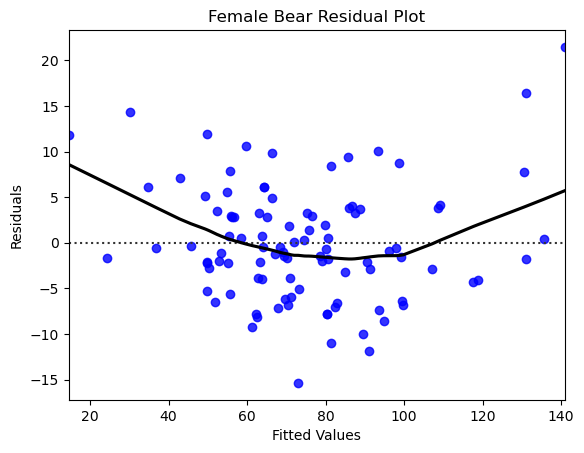

In [63]:
# create a residual plot for the model using chest girth and age and seaborn
sns.residplot(x = model_2.fittedvalues, y = model_2.resid, lowess = True, color = 'blue', line_kws={'color': 'black'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Female Bear Residual Plot')
plt.show()

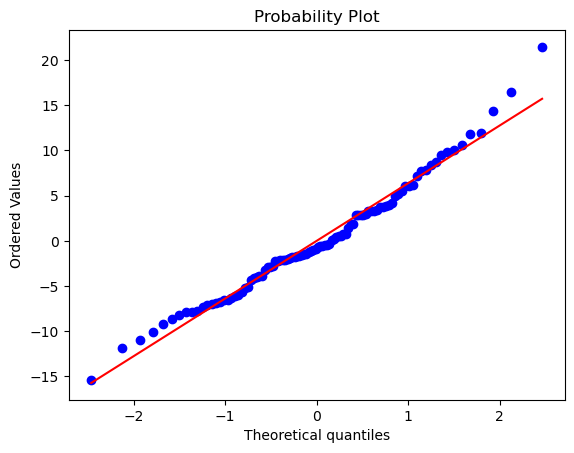

In [64]:
# Create a QQ plot for the model using chest girth and age
st.probplot(model_2.resid, dist = 'norm', plot = plt)

# Show the plot
plt.show()

In [65]:
# Create VIF for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# Create the X and Y matrices for the model
y, X = dmatrices('body_wt ~ chest_girth + age', data=female_bears_df, return_type='dataframe')

# Calculate the VIF for each variable
vif = [variance_inflation_factor(X.values, i+1) for i in range(X.shape[1]-1)]
print('Variance Inflation Factors')
print(vif)

Variance Inflation Factors
[1.2116475608087252, 1.2116475608087254]


## Step 2.f: Use the model to predict the body weight of a bear with a chest girth of 66 cm and an age of 4 years

In [66]:
# Predict the body weight of a bear with a chest girth of 66 and age of 4

# X values
x1 = 66
x2 = 7.5

# Y intercept and coefficients
b0 = -78.34 
b1 = 1.69
b2 = 0.71

# multiple Linear Regression Equation
y = b0 + b1*x1 + b2*x2

print("The expected weight of a female black bear with a chest girth of",x1,"and an age of", x2,"is", (y),"kg")

The expected weight of a female black bear with a chest girth of 66 and an age of 7.5 is 38.52499999999999 kg


## Create a Multiple Linear Regression Model to predict body weight given chest girth, age, and body length.

In [67]:
# Create the model
model_3 = ols('body_wt ~ chest_girth + age + body_len', data = female_bears_df).fit()

# Print the model summary
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                body_wt   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     511.0
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           7.25e-59
Time:                        23:09:44   Log-Likelihood:                -319.95
No. Observations:                 100   AIC:                             647.9
Df Residuals:                      96   BIC:                             658.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -97.2847      6.648    -14.635      

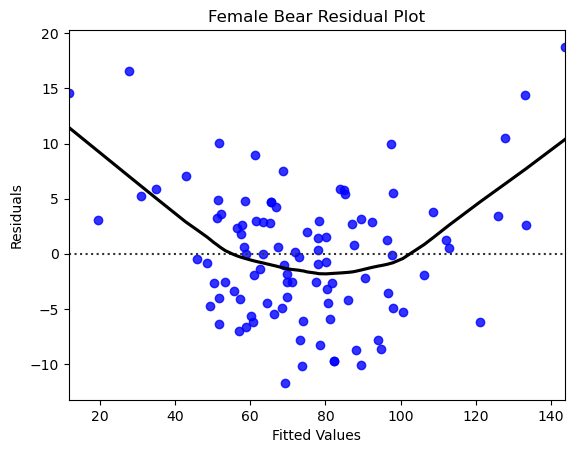

In [68]:
# create a residual plot for the model using chest girth and age and seaborn
sns.residplot(x = model_3.fittedvalues, y = model_3.resid, lowess = True, color = 'blue', line_kws={'color': 'black'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Female Bear Residual Plot')
plt.show()

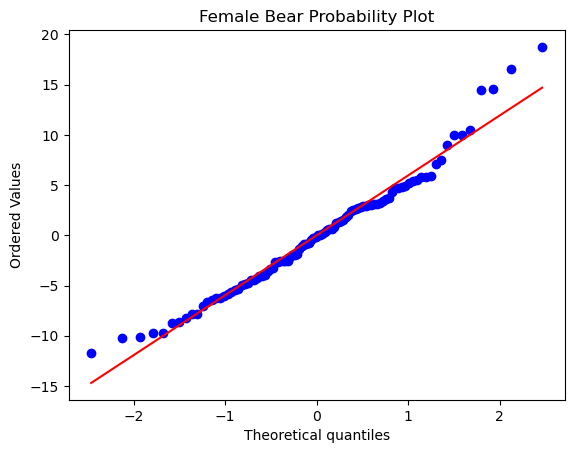

In [69]:
# Create a QQ plot for the model using chest girth and age
st.probplot(model_3.resid, dist = 'norm', plot = plt)

# Show the plot
plt.title('Female Bear Probability Plot')
plt.show()

## Predict body weight given a chest girth of 66 cm, an age of 4 years, and a body length of 135 cm.

In [70]:
# Predict the body weight of a bear with a chest girth of 66, age of 4, and body length of 135

# X values
x1 = 66
x2 = 7.5
x3 = 135

# Y intercept and coefficients female bears
b0 = -97.28
b1 = 1.53
b2 = 0.58
b3 = 0.22

# Multiple Linear Regression Equation 
y = b0 + b1*x1 + b2*x2 + b3*x3

print("The expected weight of a Black bear with a chest girth of",x1,"an age of",x2,"and a length of",x3,"is", (y),"kg")

The expected weight of a Black bear with a chest girth of 66 an age of 7.5 and a length of 135 is 37.75 kg


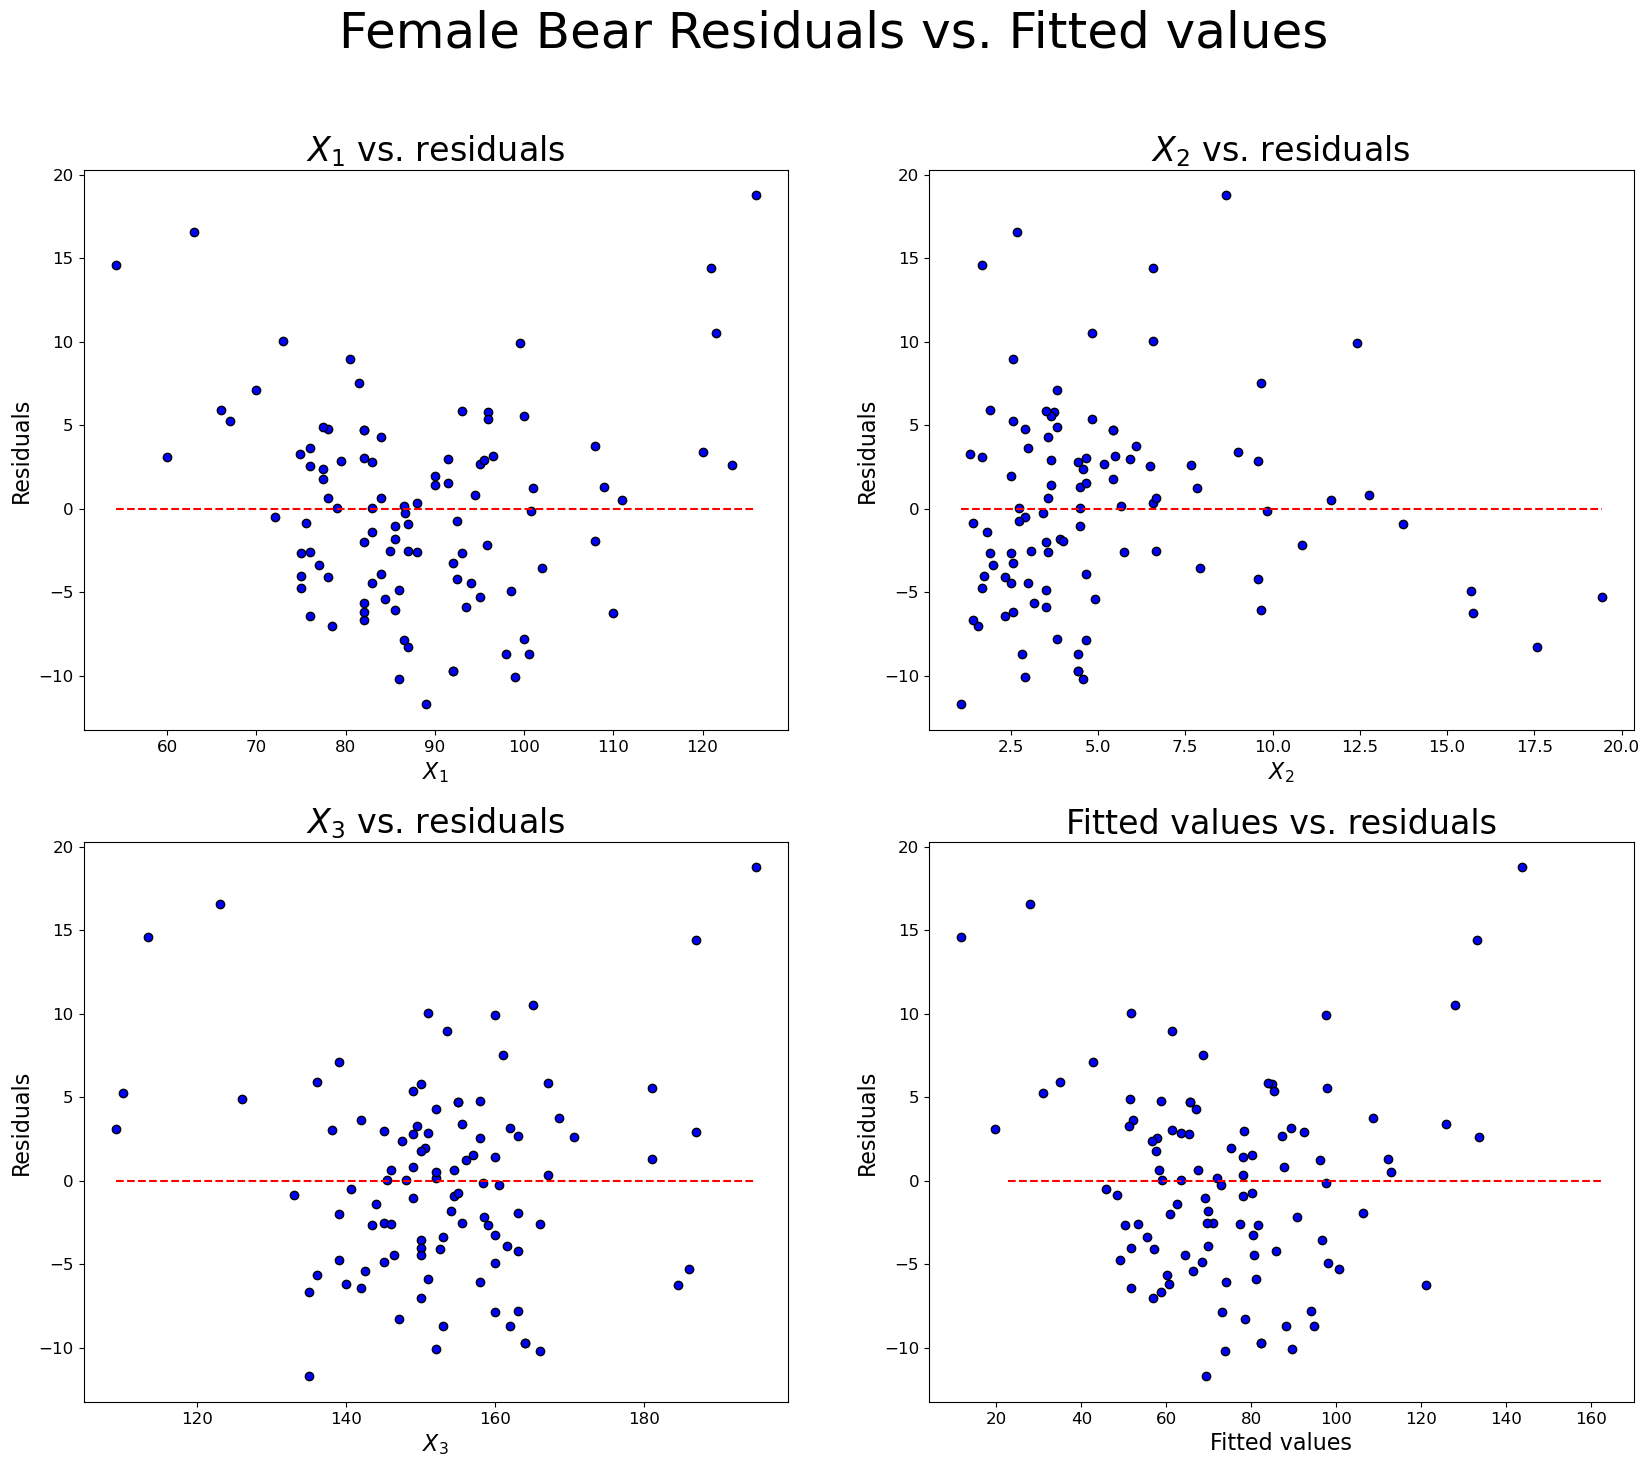

In [71]:

# Response variable
Y = female_bears_df['body_wt']


plt.figure(figsize = (20, 16))
plt.tight_layout()

plt.subplot(2, 2, 1)
plt.scatter(x = female_bears_df['chest_girth'], y = model_3.resid, color = 'blue', edgecolor = 'k')
xmin = min(female_bears_df['chest_girth'])
xmax = max(female_bears_df['chest_girth'])
plt.hlines(y = 0, xmin = xmin, xmax = xmax, color = 'red', linestyle = '--')
plt.xlabel('$X_1$', fontsize = 16)
plt.ylabel('Residuals', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('$X_1$ vs. residuals', fontsize = 24)

plt.subplot(2, 2, 2)
plt.scatter(x = female_bears_df['age'], y = model_3.resid, color = 'blue', edgecolor = 'k')
xmin = min(female_bears_df['age'])
xmax = max(female_bears_df['age'])
plt.hlines(y = 0, xmin = xmin, xmax = xmax, color = 'red', linestyle = '--')
plt.xlabel('$X_2$', fontsize = 16)
plt.ylabel('Residuals', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('$X_2$ vs. residuals', fontsize = 24)

plt.subplot(2, 2, 3)
plt.scatter(x = female_bears_df['body_len'], y = model_3.resid, color = 'blue', edgecolor = 'k')
xmin = min(female_bears_df['body_len'])
xmax = max(female_bears_df['body_len'])
plt.hlines(y = 0, xmin = xmin, xmax = xmax, color = 'red', linestyle = '--')
plt.xlabel('$X_3$', fontsize = 16)
plt.ylabel('Residuals', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('$X_3$ vs. residuals', fontsize = 24)

plt.subplot(2, 2, 4)
plt.scatter(x = model_3.fittedvalues, y = model_3.resid, color = 'blue', edgecolor = 'k')
xmin = min(Y)
xmax = max(Y)
plt.hlines(y = 0, xmin = xmin, xmax = xmax, color = 'red', linestyle = '--')
plt.xlabel('Fitted values', fontsize = 16)
plt.ylabel('Residuals', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Fitted values vs. residuals', fontsize = 24)

# add a figure title
plt.suptitle('Female Bear Residuals vs. Fitted values', fontsize = 36)

plt.show()



In [72]:
# Create VIF for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# Create the X and Y matrices for the model
y, X = dmatrices('body_wt ~ chest_girth + age + body_len', data=female_bears_df, return_type='dataframe')

# Calculate the VIF for each variable
vif = [variance_inflation_factor(X.values, i+1) for i in range(X.shape[1]-1)]
print('Variance Inflation Factors')
print(vif)

Variance Inflation Factors
[2.176784728661906, 1.2531524171565982, 2.1739406798983736]


In [73]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Response variable 
Y = female_bears_df['body_wt']

# Create a new dataframe with the a dictionary of the predictor variables
new = pd.DataFrame({'chest_girth': [66], 'age': [7.5], 'body_len': [140]})
print(model_3.get_prediction(new, weights = 1).summary_frame(alpha = 0.01))

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  39.064736  1.476613      35.184175      42.945298     22.684939   

   obs_ci_upper  
0     55.444534  


In [74]:

# Response variable 
Y = female_bears_df['body_wt']

# Create a new dataframe with the a dictionary of the predictor variables
new2 = pd.DataFrame({'chest_girth': [101.25], 'age': [7.5], 'body_len': [162.20]})
print(model_3.get_prediction(new2, weights = 1).summary_frame(alpha = 0.01))

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  97.842597  0.872237      95.550344     100.134851     81.764866   

   obs_ci_upper  
0    113.920329  
